In [86]:
import math
import cv2
import numpy as np
import skimage.data 

In [87]:
import matplotlib.pyplot as plt
from PIL import Image

In [88]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
def gauss(siz, sig): 
    x, y = np.mgrid[-siz//2 + 1:siz//2 + 1, -siz//2 + 1:siz//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sig**2)))
    return g/g.sum()

In [89]:
#k test var
def conv(image1, filter1):
    size1 = filter1.shape[0]
    n = image1.shape[0]
    m = image1.shape[1]
    l = []
    for r in range(size1//2, n - size1//2):
        tmp = []
        for c in range(size1//2, m - size1//2):
            cur = image1[r-size1//2:r+size1//2+1, c-size1//2:c+size1//2+1]
#             print(cur.shape)
            tmp.append(np.sum(cur * filter1))
        l.append(tmp)
    l = np.asarray(l)
    return l
#     print(l)

In [90]:
#l
def conv_layer(image1, filters):
    res = []
    for it in range(filters.shape[0]): #16
        cur_filter = filters[it] #6*5*5 filter
        if(len(cur_filter.shape) > 2): 
            tmp = conv(image1[0], cur_filter[0])
            for i in range(1, cur_filter.shape[0]):
                tmp += conv(image1[i], cur_filter[i]) #adding 6 5*5 filters
        else:
            tmp = conv(image1, cur_filter)
        res.append(tmp)
    res = np.asarray(res)
    return res

In [91]:
#o
def pooling(feature_map, size=2, stride=2):
    if(len(feature_map.shape) == 2):
        n, m = feature_map.shape
        l = []
        for r in range(0, n-size+1, stride):
            tmp = []
            for c in range(0, m-size+1, stride):
                cur = feature_map[r:r+size, c:c+size]
                tmp.append(np.max(cur))
            l.append(tmp)
        l = np.asarray(l)
        return l
    else:
        d, n, m = feature_map.shape
        res = []
        for it in range(d):
            l = []
            for r in range(0, n-size+1, stride):
                tmp = []
                for c in range(0, m-size+1, stride):
                    cur = feature_map[it, r:r+size, c:c+size]
                    tmp.append(np.max(cur))
                l.append(tmp)
            res.append(l)
        res = np.asarray(res)
        return res

(32, 32)


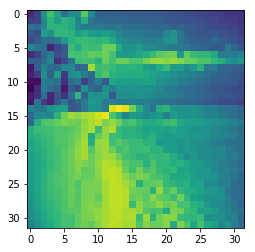

In [92]:
## READ IMAGE
#l
om = cv2.imread("./d1.jpeg")
img_gray = cv2.cvtColor(om, cv2.COLOR_BGR2GRAY)
om = cv2.resize(img_gray, (32, 32))
om = np.asarray(om, dtype=np.uint8)
plt.imshow(om)
print(om.shape)

### CONVOLUTION LAYER 1 

(6, 28, 28)


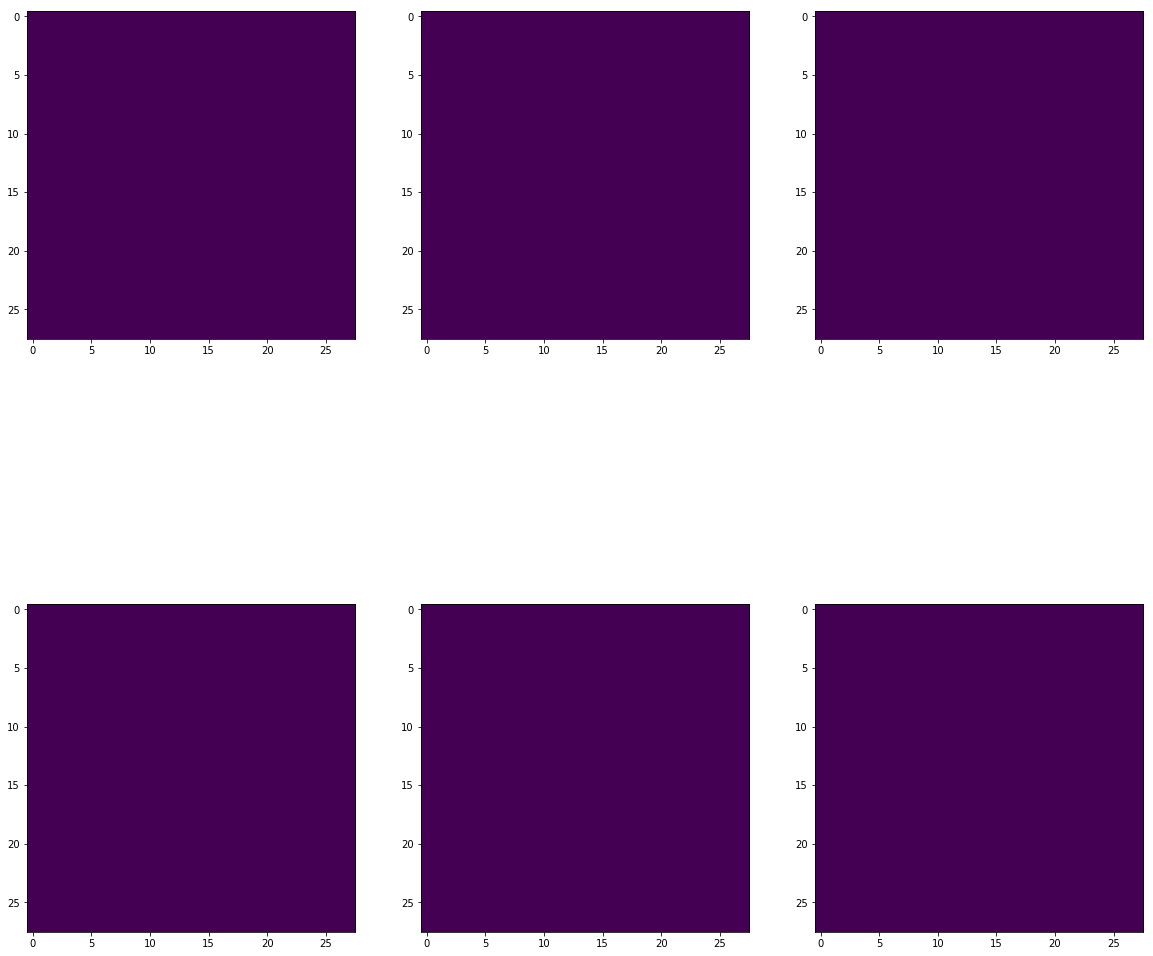

In [93]:
## CREATE FILTERS

filters = np.zeros((6, 5, 5))
#o
for it in range(6):
    filters[it, :, :] = gauss(5, it+1) #with differnt sigma values creating 6 guassian filters

## EXECUTE GIVEN ARCHITECTURE

conv1 = conv_layer(om, filters) #doing conv with every filter
conv1 = tanh(conv1) #activation to all conv_o/ps
rows = 2
cols = math.ceil(conv1.shape[0]/2)
fig=plt.figure(figsize=(20, 20))
for it in range(1, conv1.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(conv1[it-1])
print(conv1.shape)

### POOLING LAYER 1

(6, 14, 14)


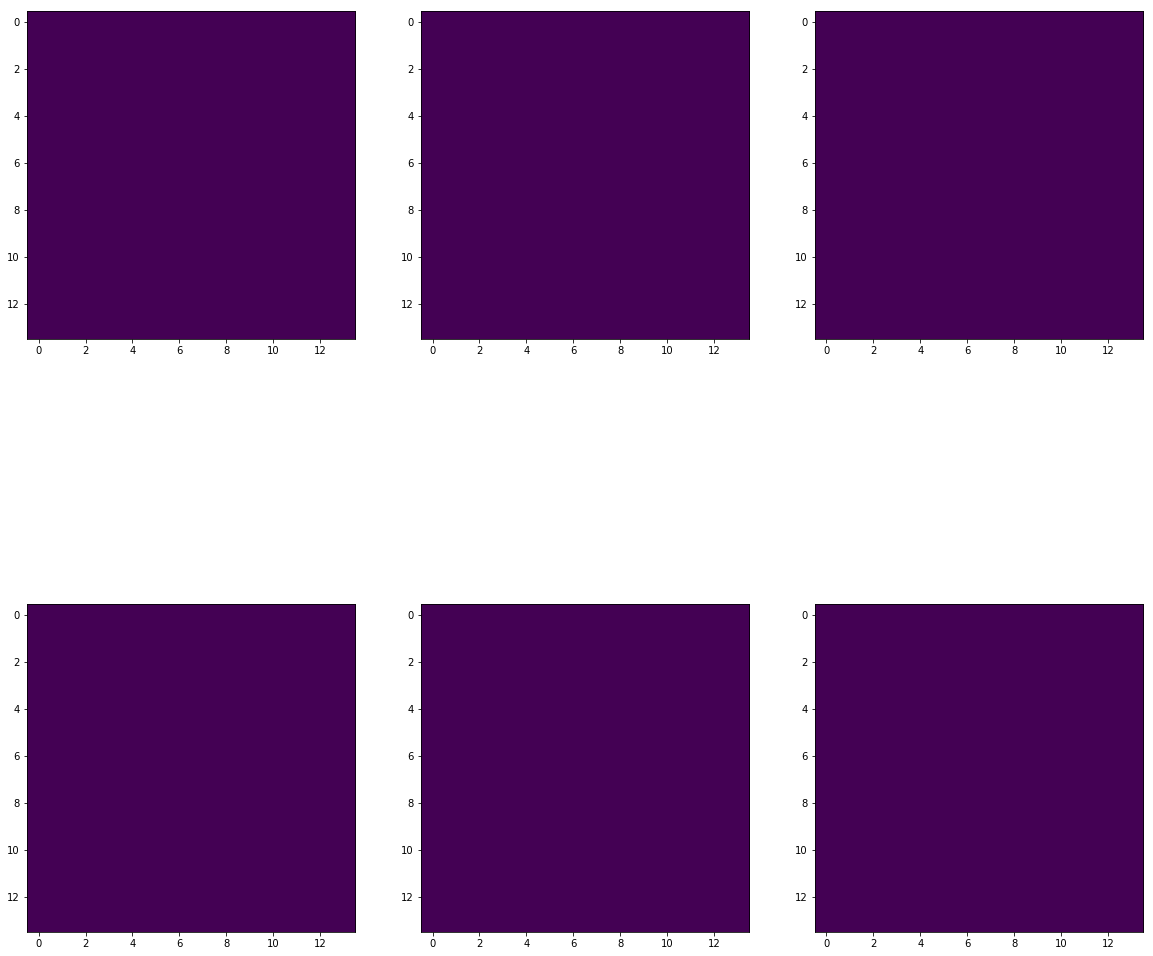

In [94]:
#s
pool1 = pooling(conv1, 2, 2) 
rows = 2
cols = math.ceil(pool1.shape[0]/2)
fig=plt.figure(figsize=(20, 20))
for it in range(1, pool1.shape[0]+1): #doing pooling n/2 => 6 14*14 images
    fig.add_subplot(rows, cols, it)
    plt.imshow(pool1[it-1])
print(pool1.shape)

### CONVOLUTION LAYER 2

(16, 10, 10)


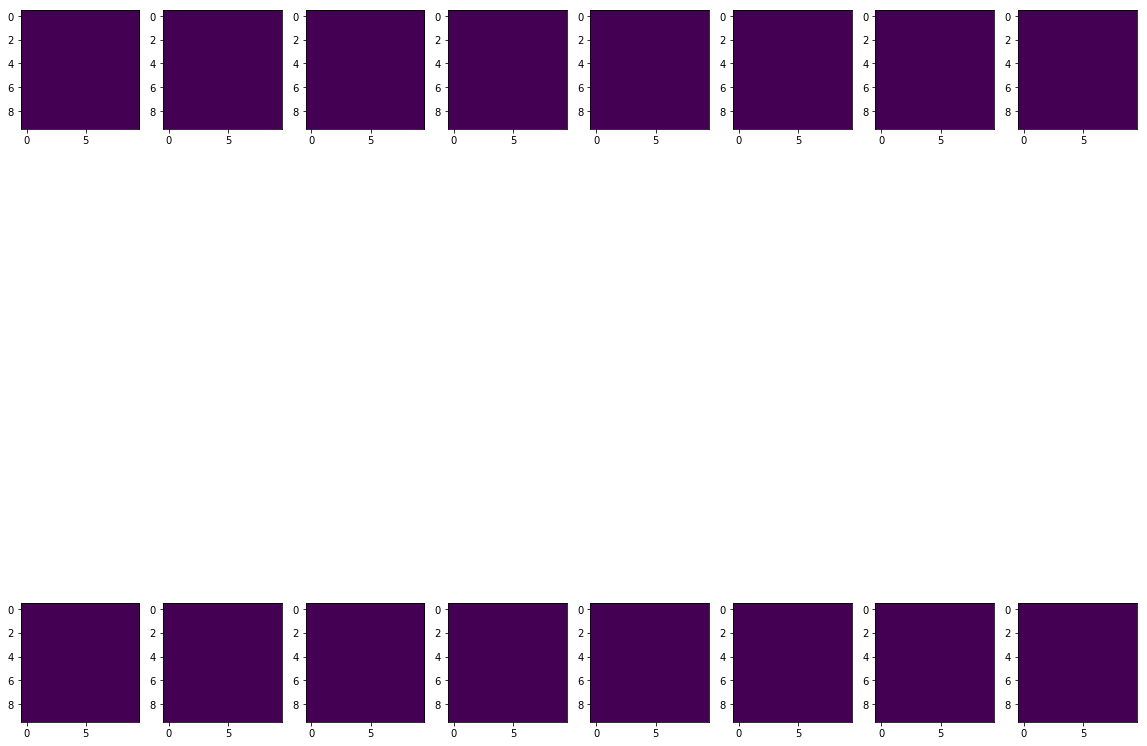

In [95]:
#l
ff = np.random.rand(16, pool1.shape[0], 5, 5) - 0.5 #convolution with random filters
# print(ff.shape) => (16,6,5,5)

conv2 = conv_layer(pool1, ff)
conv2 = np.asarray(conv2)
conv2 = tanh(conv2)
# print(conv2[0])
rows = 2
cols = math.ceil(conv2.shape[0]/2)
fig=plt.figure(figsize=(20, 20))
for it in range(1, conv2.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(conv2[it-1])
print(conv2.shape)

### POOLING LAYER 2

(16, 5, 5)


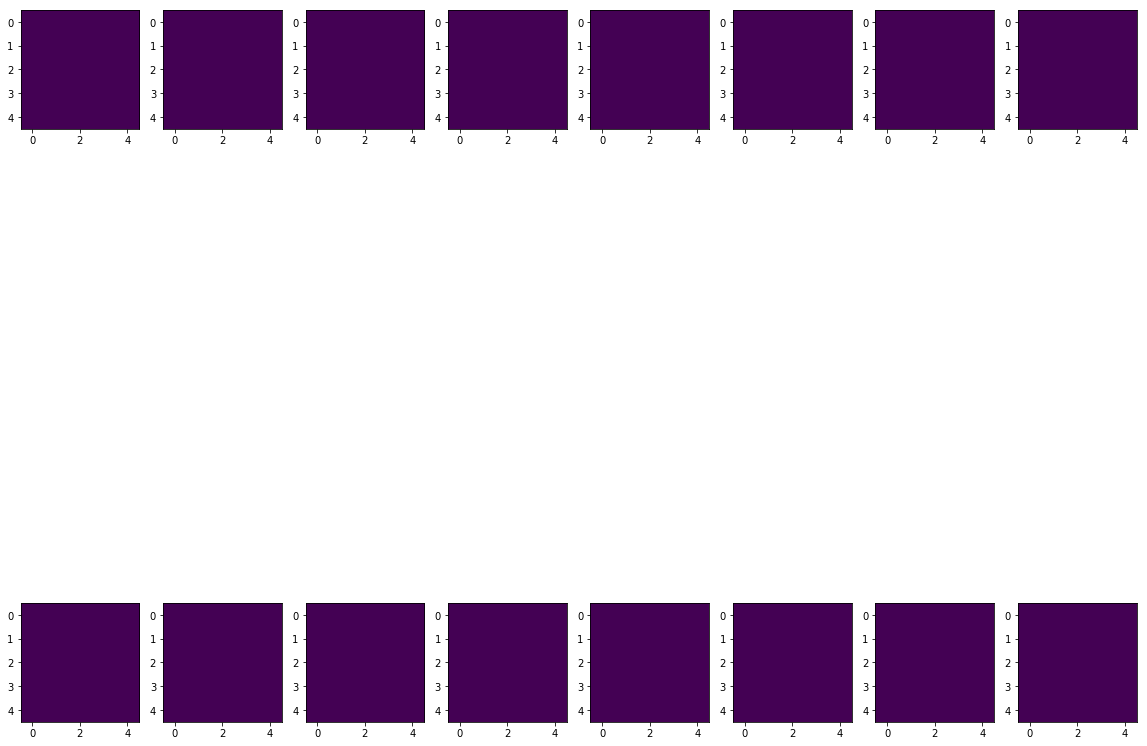

In [96]:
#l
pool2 = pooling(conv2)
rows = 2
cols = math.ceil(pool2.shape[0]/2)
fig=plt.figure(figsize=(20, 20))
for it in range(1, pool2.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(pool2[it-1])
print(pool2.shape)

### FULLY CONNECTED CONVOLUTION LAYER 1

(120, 1, 1)


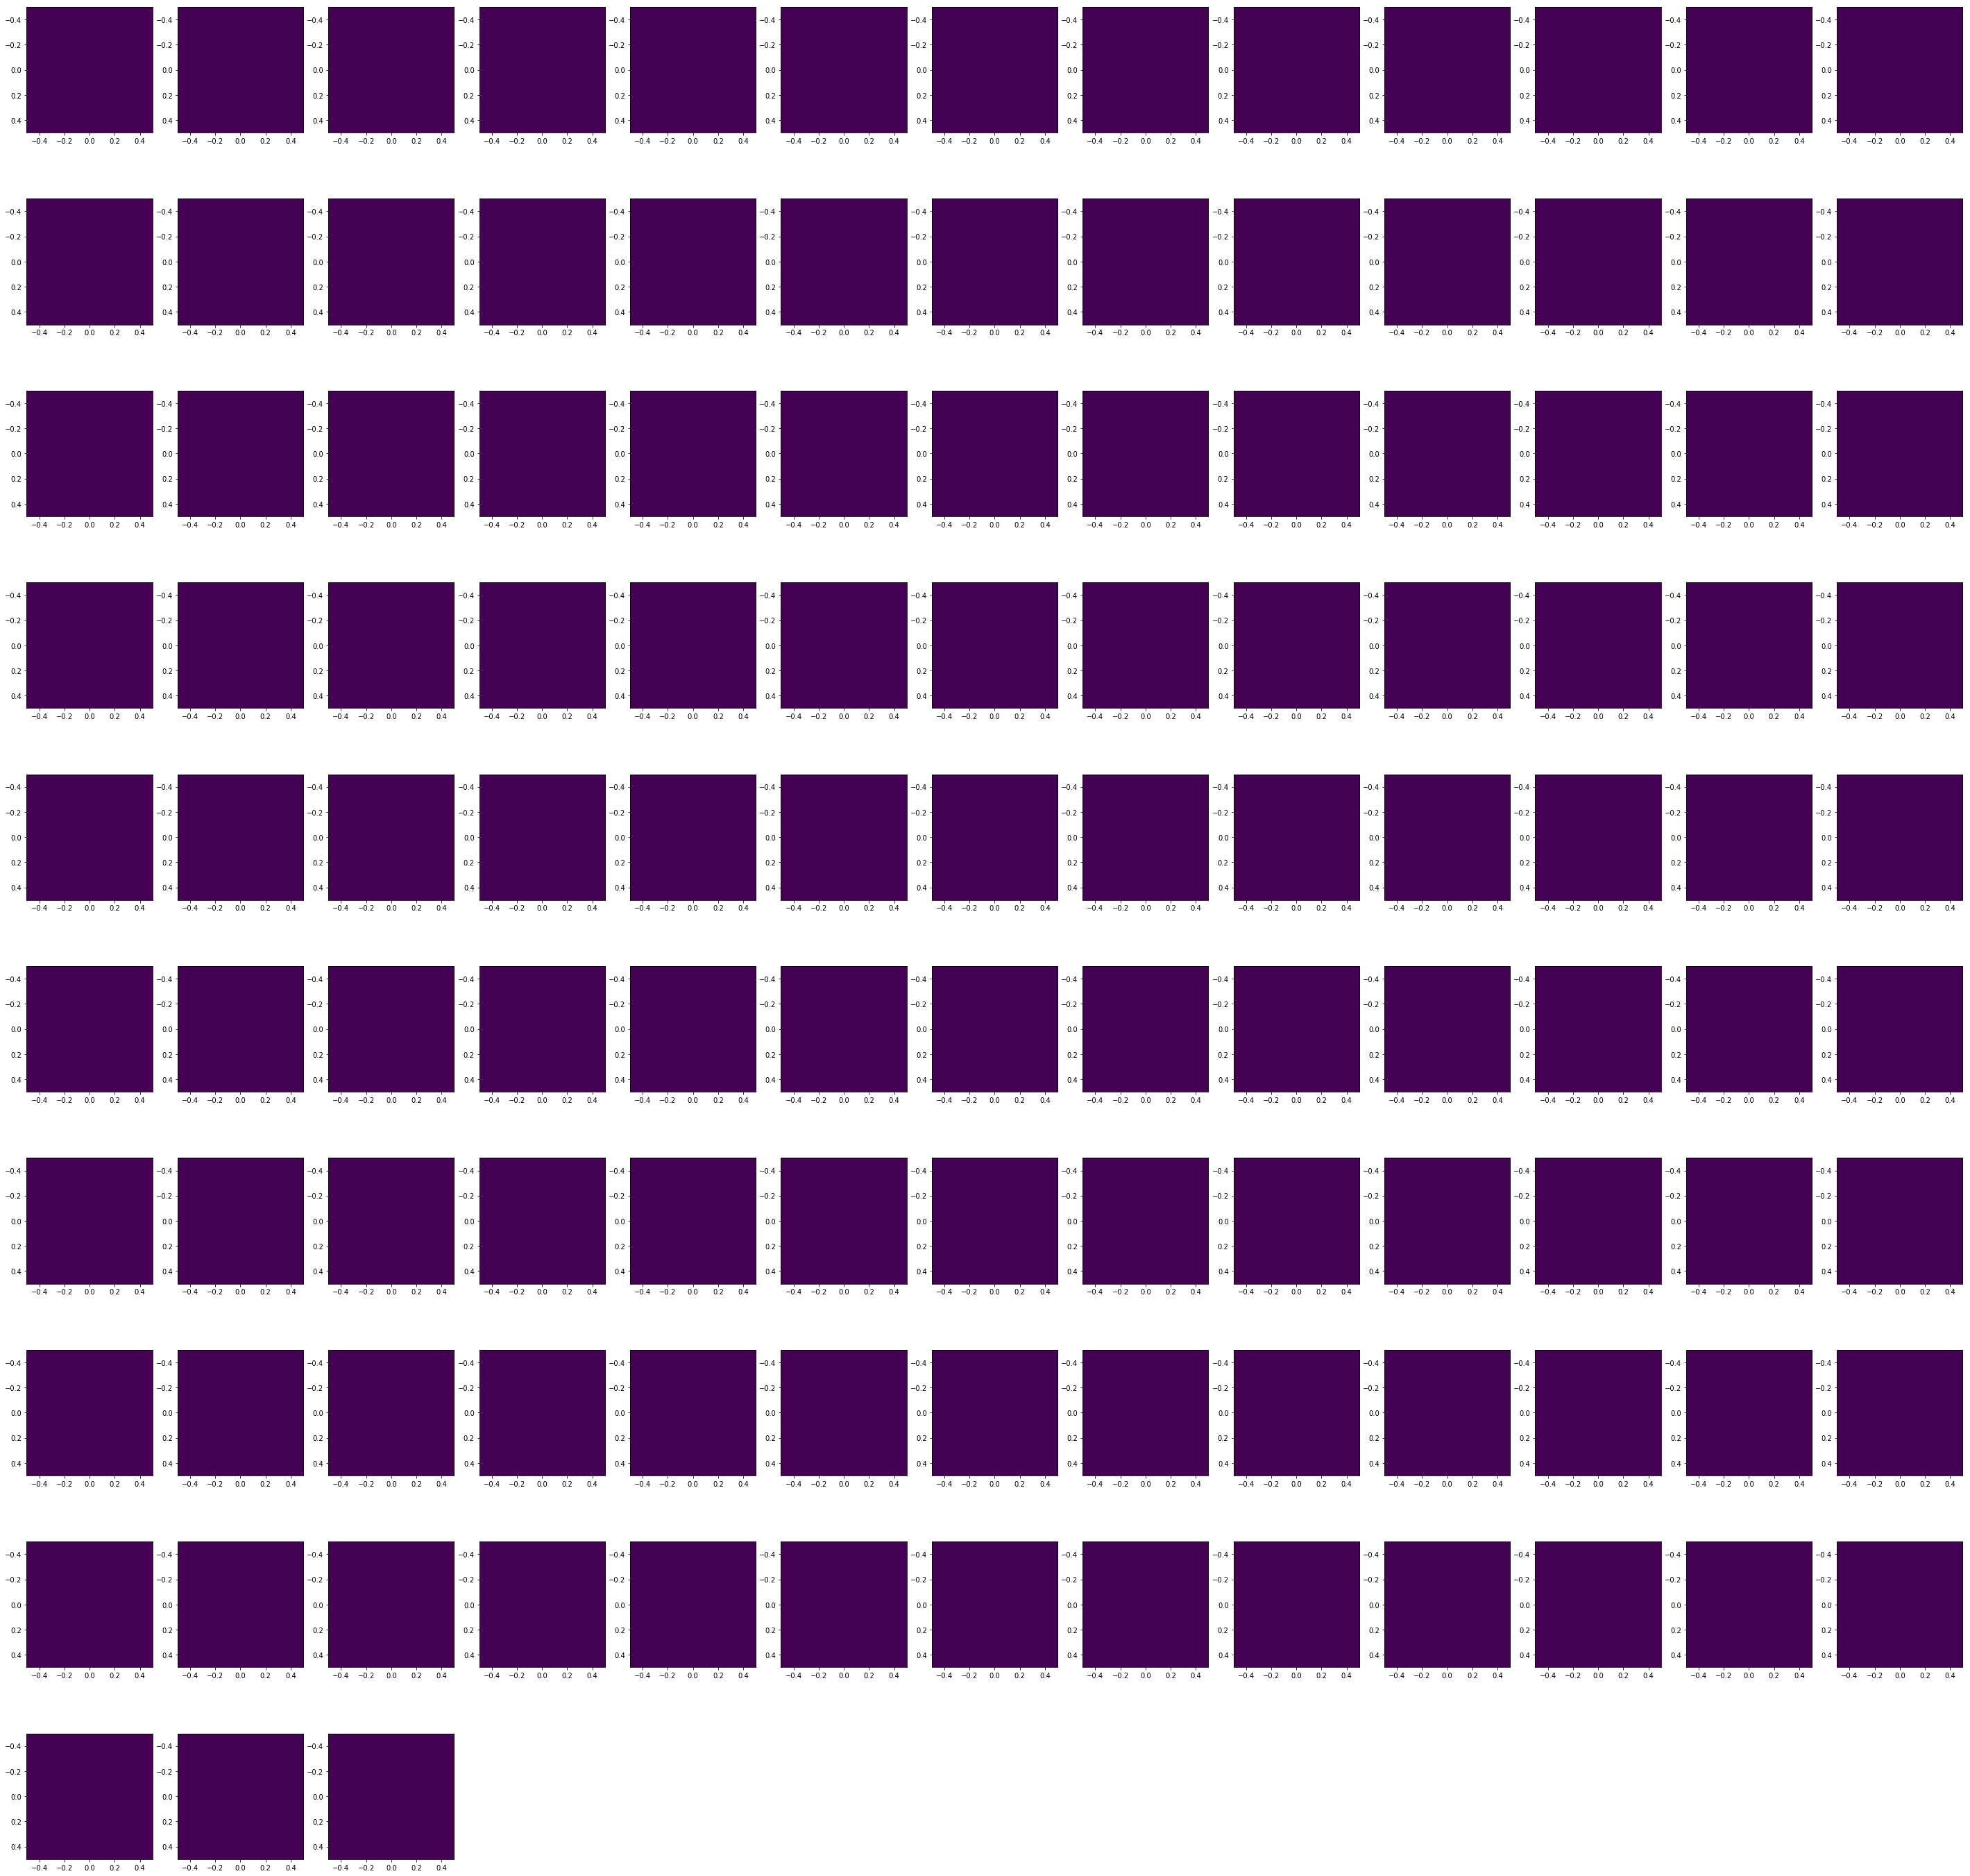

In [97]:
#l 
ff = np.random.rand(120, pool2.shape[0], 5, 5) - 0.5 #(120,16,5,5)
fc1 = conv_layer(pool2, ff)
fc1 = np.asarray(fc1)
rows = 10
cols = math.ceil(fc1.shape[0]/10 + 1)
fig=plt.figure(figsize=(50, 50))
for it in range(1, fc1.shape[0]+1):
    fig.add_subplot(rows, cols, it)
    plt.imshow(fc1[it-1])
print(fc1.shape)

### FULLY CONNECTED DENSE LAYER 2

In [98]:
fc1 = fc1.reshape((120, 1))
w2 = np.random.rand(84, 120) - 0.5
b2 = np.random.rand(84, 1) - 0.5

fc2 = np.dot(w2, fc1) + b2
fc2 = tanh(fc2)
# fc2[fc2<0]=0
print(fc2.shape)
print(fc2)

(84, 1)
[[-1.        ]
 [-1.        ]
 [-0.9999956 ]
 [-0.99999994]
 [ 1.        ]
 [-1.        ]
 [-1.        ]
 [-0.99999921]
 [-0.09055683]
 [-0.86362445]
 [ 1.        ]
 [ 0.99906502]
 [-1.        ]
 [-0.99999106]
 [-1.        ]
 [ 0.99968248]
 [-0.99999425]
 [-1.        ]
 [ 0.9999994 ]
 [-1.        ]
 [-0.99999981]
 [ 0.99999632]
 [ 0.99987711]
 [ 1.        ]
 [-0.97460835]
 [ 1.        ]
 [-0.99996104]
 [ 0.99999606]
 [ 1.        ]
 [ 1.        ]
 [-0.99593887]
 [-0.00405491]
 [-1.        ]
 [-1.        ]
 [ 1.        ]
 [-1.        ]
 [-1.        ]
 [ 0.98189761]
 [ 1.        ]
 [ 1.        ]
 [-1.        ]
 [-1.        ]
 [ 0.9999156 ]
 [ 0.7464171 ]
 [-1.        ]
 [-0.99998577]
 [-1.        ]
 [ 1.        ]
 [ 1.        ]
 [-0.42305869]
 [-0.99999999]
 [ 0.99989389]
 [ 0.99999995]
 [ 1.        ]
 [ 1.        ]
 [-1.        ]
 [ 0.9999993 ]
 [-0.99999927]
 [-1.        ]
 [-0.9999702 ]
 [-1.        ]
 [-1.        ]
 [ 1.        ]
 [ 0.99998492]
 [-0.94952948]
 [-1.        ]
 [

## OUTPUT SOFTMAX LAYER

In [99]:
w3 = np.random.rand(10, 84) - 0.5
b3 = np.random.rand(10, 1) - 0.5

out = np.dot(w3, fc2) + b3
out = softmax(out)
print(out)

[[0.15359919]
 [0.00314033]
 [0.30215559]
 [0.06650638]
 [0.01186928]
 [0.18861733]
 [0.12784984]
 [0.12918303]
 [0.002687  ]
 [0.01439203]]
